In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lulc_flow_pts.csv', usecols=range(1, len(pd.read_csv('lulc_flow_pts.csv').columns)))
df

,pointid,flow_level,pointid_1,LCLU,flow_id,from_node,to_node
0,1,1,106456,505,1,1,2
1,2,1,107133,505,1,1,2
2,3,1,107811,505,1,1,2
3,4,1,108489,505,1,1,2
4,5,1,542181,505,2,3,4
...,...,...,...,...,...,...,...
9438,9439,1,6158423,909,1374,2219,2221
9439,9440,1,6158763,909,1373,2212,2220
9440,9441,1,6158770,909,1374,2219,2221
9441,9442,1,6159107,909,1374,2219,2221


In [3]:
df = df.sort_values(by='flow_id').reset_index(drop=True)
df

,pointid,flow_level,pointid_1,LCLU,flow_id,from_node,to_node
0,1,1,106456,505,1,1,2
1,2,1,107133,505,1,1,2
2,3,1,107811,505,1,1,2
3,4,1,108489,505,1,1,2
4,5,1,542181,505,2,3,4
...,...,...,...,...,...,...,...
9438,9442,1,6159107,909,1374,2219,2221
9439,9437,1,6158071,909,1374,2219,2221
9440,9439,1,6158423,909,1374,2219,2221
9441,9441,1,6158770,909,1374,2219,2221


In [4]:
# 提取所需列
lclu = df['LCLU'].values
flow_id = df['flow_id'].values
flow_level = df['flow_level'].values

# 获取所有土地类型的唯一ID
unique_lclu_ids = np.unique(lclu)
num_lclu_ids = len(unique_lclu_ids)

# 初始化下三角矩阵
adjacency_matrix_count = np.zeros((num_lclu_ids, num_lclu_ids), dtype=int)
adjacency_matrix_level = np.zeros((num_lclu_ids, num_lclu_ids), dtype=int)

# 创建土地类型ID到索引的映射
lclu_id_to_index = {lclu_id: idx for idx, lclu_id in enumerate(unique_lclu_ids)}

In [5]:
# 遍历数据，更新矩阵
for i in range(len(lclu) - 1):
    if flow_id[i] == flow_id[i + 1]:
        lclu1 = lclu[i]
        lclu2 = lclu[i + 1]
        idx1 = lclu_id_to_index[lclu1]
        idx2 = lclu_id_to_index[lclu2]
        
        # 更新下三角矩阵
        if idx1 >= idx2:
            adjacency_matrix_count[idx1, idx2] += 1
            adjacency_matrix_level[idx1, idx2] += flow_level[i]
        else:
            adjacency_matrix_count[idx2, idx1] += 1
            adjacency_matrix_level[idx2, idx1] += flow_level[i]
            
print(adjacency_matrix_count)
print(adjacency_matrix_level)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   2  356    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   2   23  212    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    2    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   10    0    0  162    0    0    0    0    0    0    0    0    0
     0]
 [   0    0   12    1    0   10    0    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    1    0    0    0    0    0    0    0
     0]
 [   0   65    0    0    0    0    0  587    0    0    0    0    0    0
     0]
 [   0   65    0    0    0    0    0  134 4716    0    0    0    0    0
     0]
 [   0   28    0    0    0    0    0   37  723  730    0    0    0    0
     0]
 [   0    4    0    0    0    0    0    1   20   77   13    0    0    0
     0]
 [   0   22    0    0    0    0    3    0    2    3    0   12    0    0
     0]
 [   0   11    2    0    0    0    0    

In [7]:
import numpy as np

def divide_nonzero_elements(matrix_a, matrix_b):
    # 检查两个矩阵的形状是否相同
    if matrix_a.shape != matrix_b.shape:
        raise ValueError("两个矩阵的形状必须相同")

    # 创建一个与输入矩阵形状相同的空矩阵用于存储结果
    result_matrix = np.zeros_like(matrix_a, dtype=float)

    # 遍历矩阵中的每一个元素
    for i in range(matrix_a.shape[0]):
        for j in range(matrix_a.shape[1]):
            # 只有当两个矩阵在该位置上的元素都不是零时才进行除法
            if matrix_a[i][j] != 0 and matrix_b[i][j] != 0:
                result_matrix[i][j] = matrix_a[i][j] / matrix_b[i][j]

    return result_matrix

# 执行非零元素的除法
result = divide_nonzero_elements(adjacency_matrix_level, adjacency_matrix_count)
print(result)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         1.23876404 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         1.         1.00943396 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.6        0.         0.         1.22839506 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         1.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  1.

In [9]:
# 创建一个掩蔽矩阵，用于隐藏下三角部分
mask = np.triu(np.ones_like(result, dtype=bool),k=1)

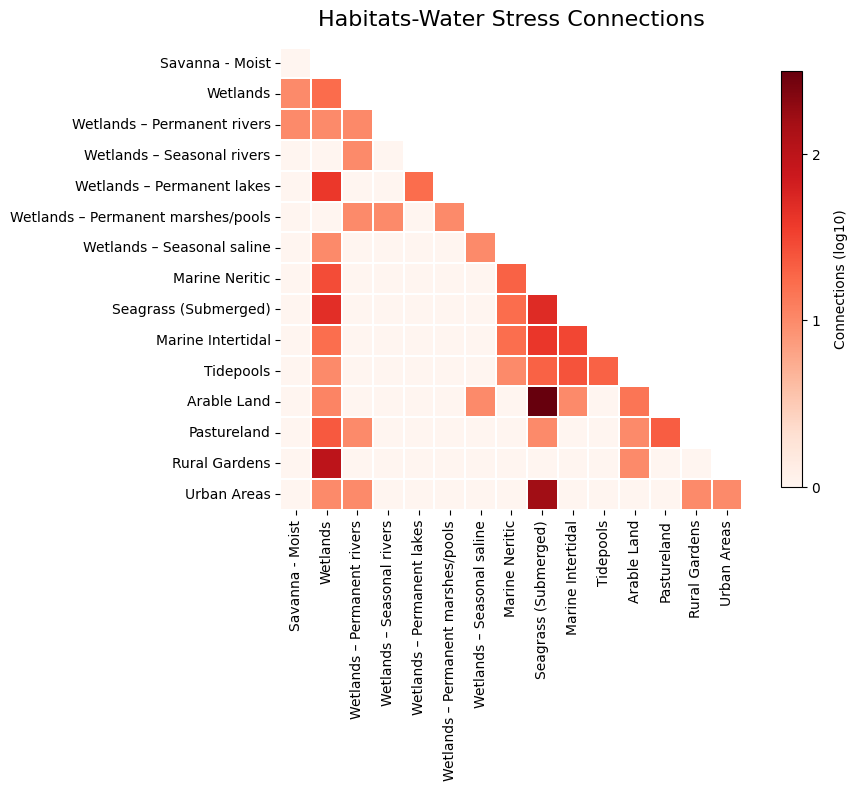

In [11]:
lclu_types=['Savanna - Moist',
            'Wetlands',
            'Wetlands – Permanent rivers',
            'Wetlands – Seasonal rivers',
            'Wetlands – Permanent lakes',
            'Wetlands – Permanent marshes/pools',
            'Wetlands – Seasonal saline',
            'Marine Neritic',
            'Seagrass (Submerged)',
            'Marine Intertidal',
            'Tidepools',
            'Arable Land',
            'Pastureland',
            'Rural Gardens',
            'Urban Areas']

ccmap = sns.color_palette("Reds", as_cmap=True)
ccmap.set_under('grey')

plt.figure(figsize=(10,6))
ax = sns.heatmap(result, cmap=ccmap, annot=False,fmt='d',mask=mask,
            yticklabels=lclu_types,xticklabels=lclu_types,
            linewidths=0.1,linecolor='white',square=True,cbar=False)

# 添加 colorbar 并设置刻度标签
cbar = ax.figure.colorbar(ax.collections[0], ax=ax, ticks=[0, 1, 2, 3], shrink=0.9)
cbar.ax.set_yticklabels(['0', '1', '2','3'])
cbar.set_label('Connections (log10)', labelpad=10)  # 设置 colorbar 标题

ax.set_title('Habitats-Water Stress Connections',y=1.03,fontsize=16)
ax.xaxis.set_label_position('top')
plt.show()

In [ ]:
pip install --upgrade matplotlib